Based on the torch geometric tutorial code, with some modifications such as the use of SNAP. More will be shown later.

<IPython.core.display.Javascript object>

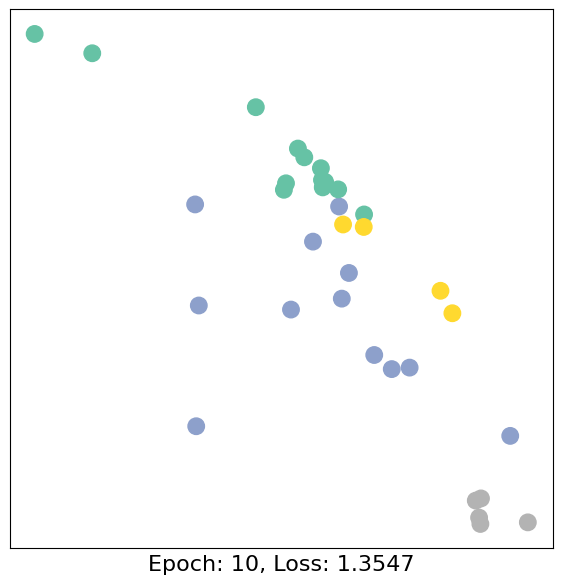

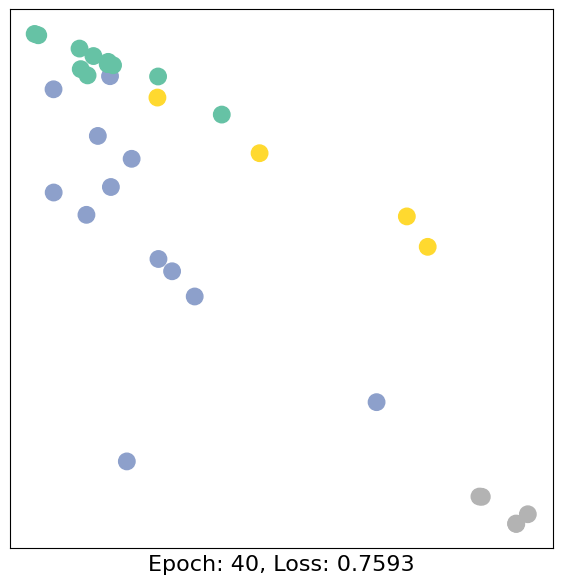

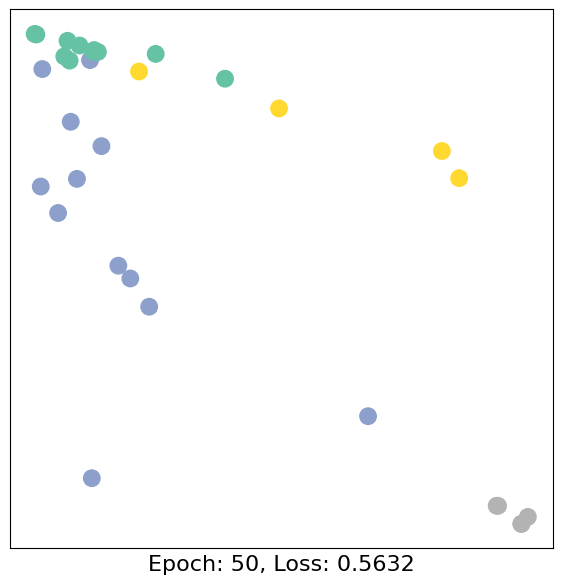

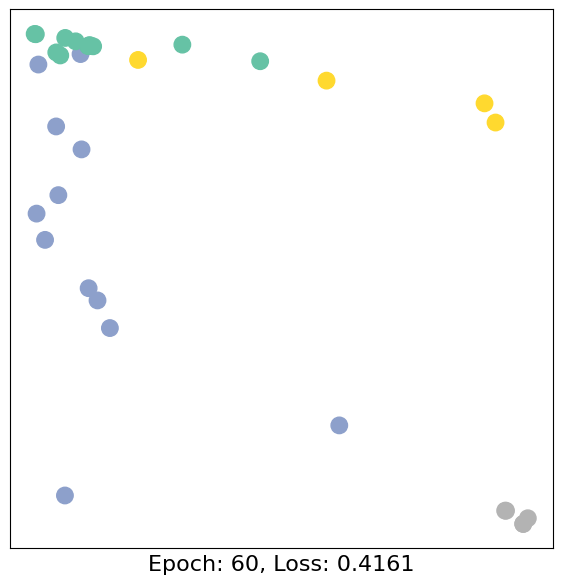

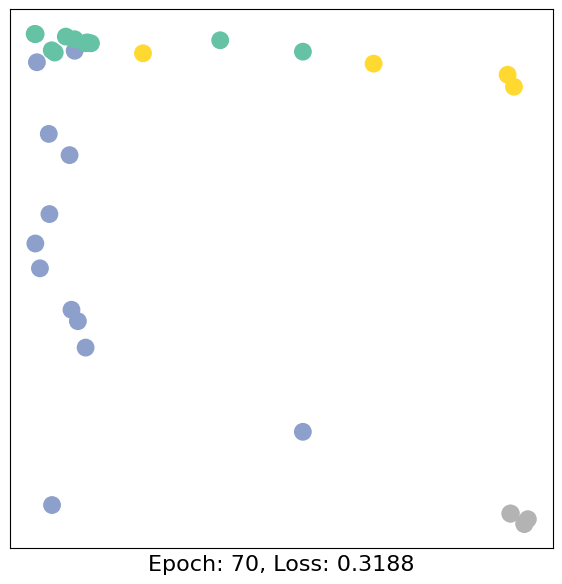

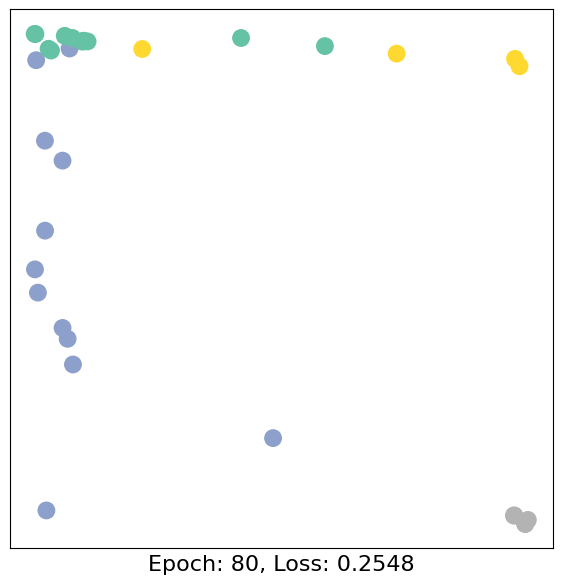

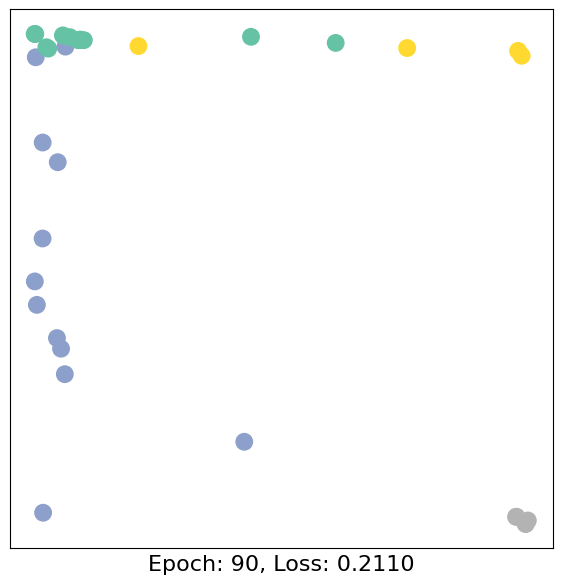

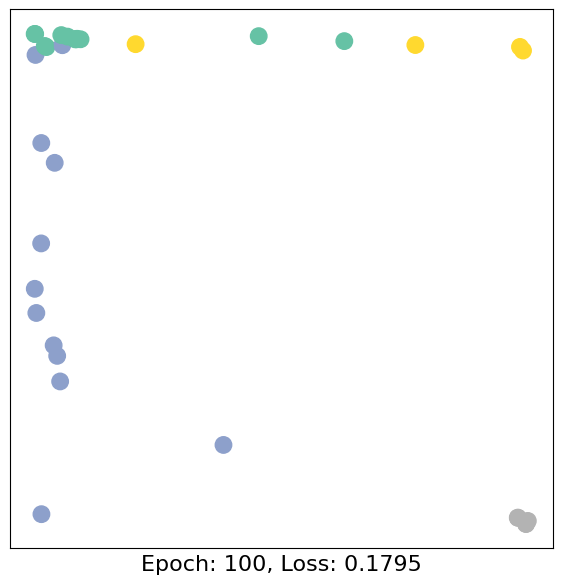

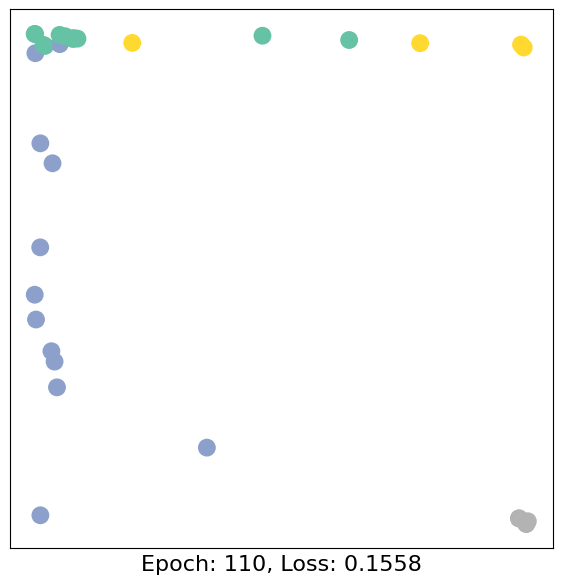

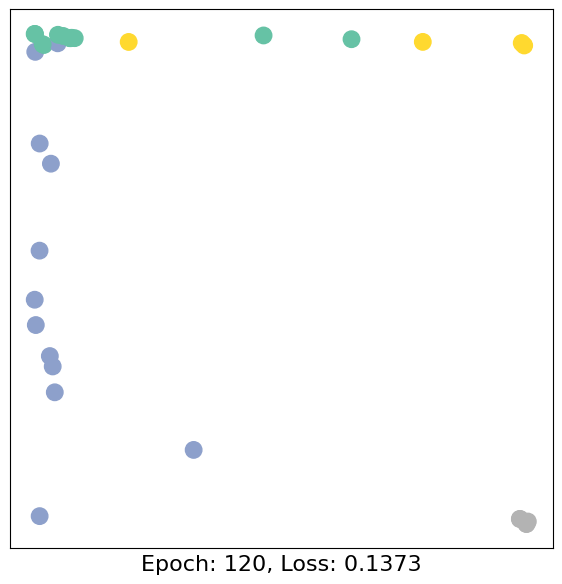

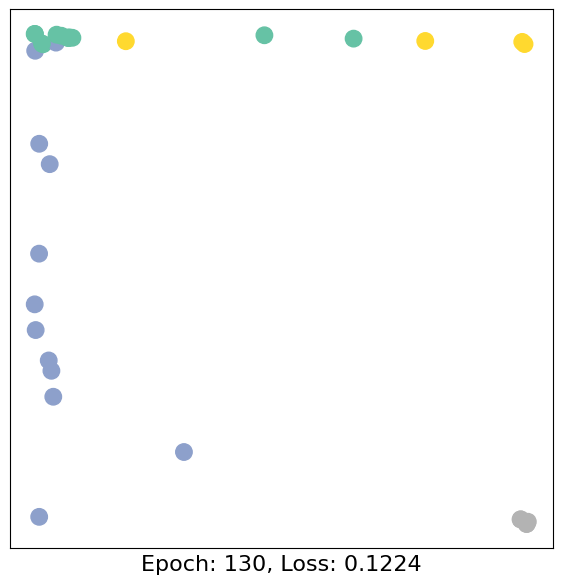

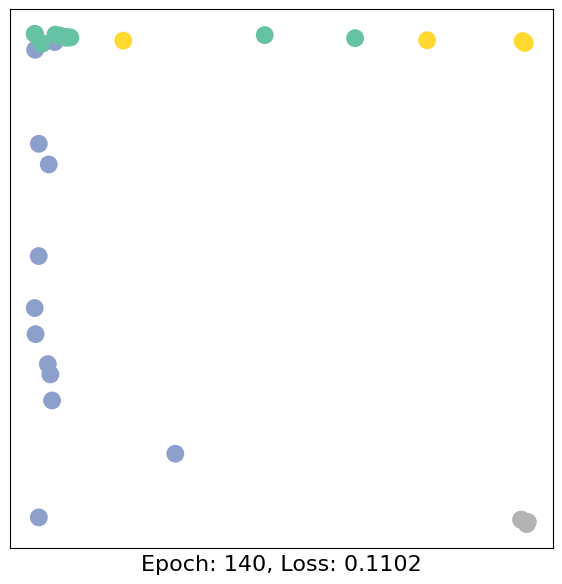

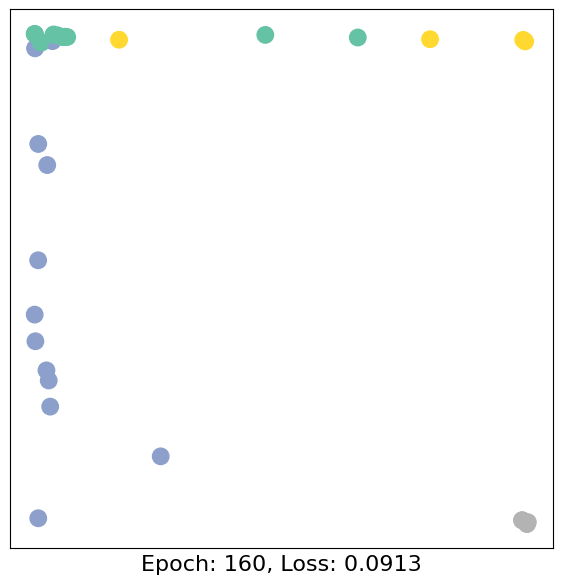

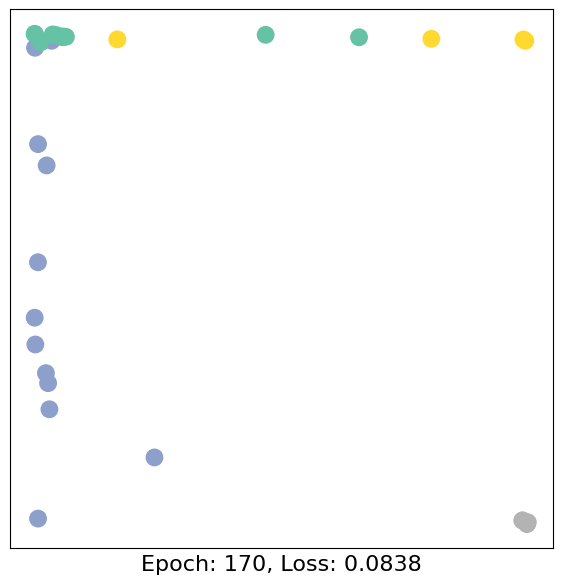

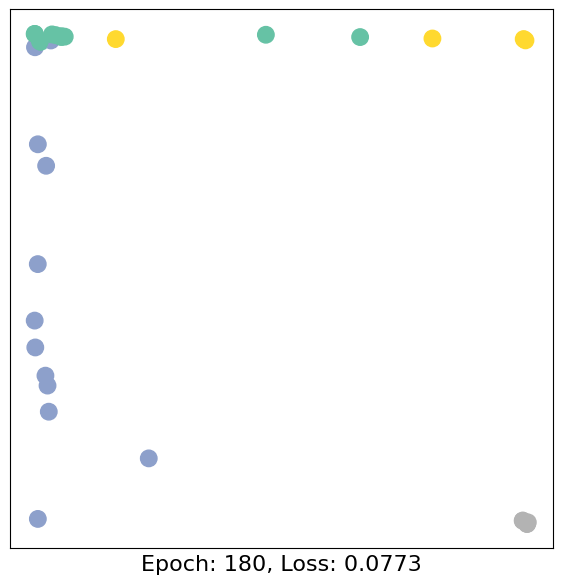

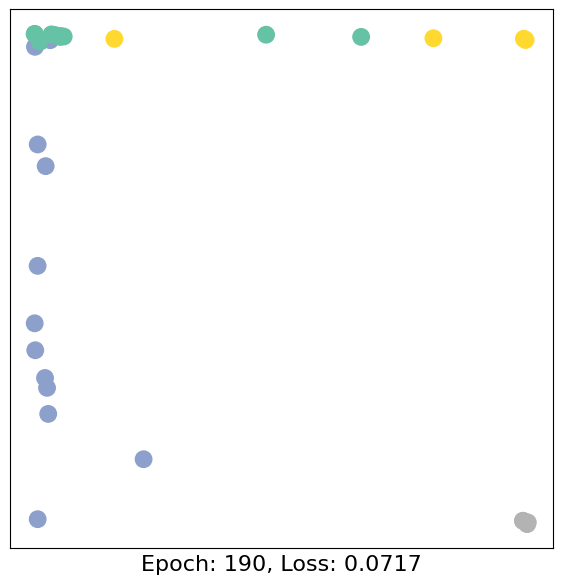

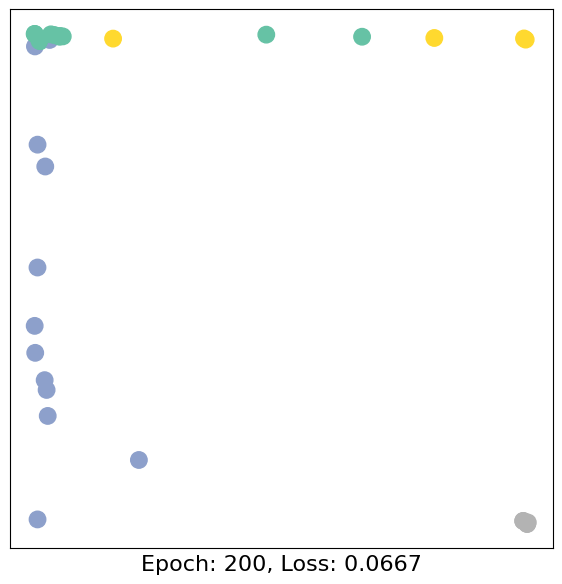

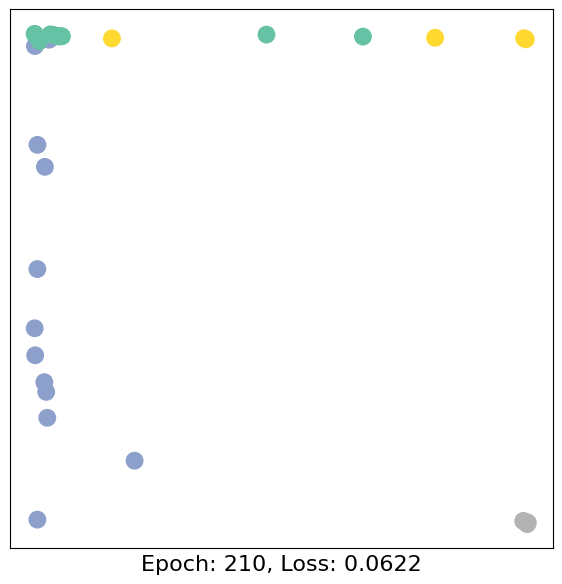

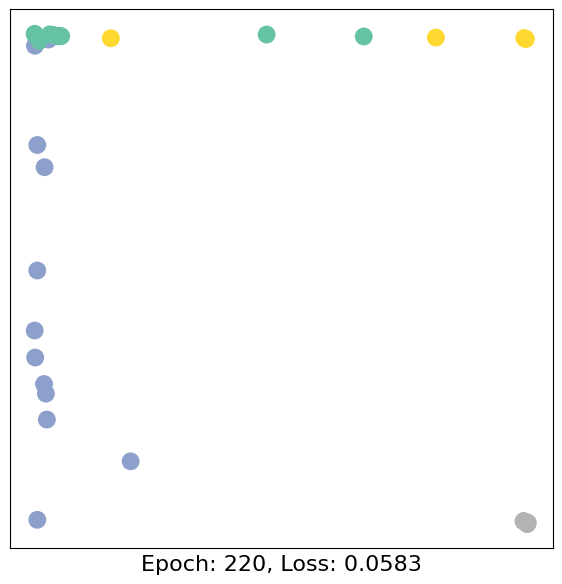

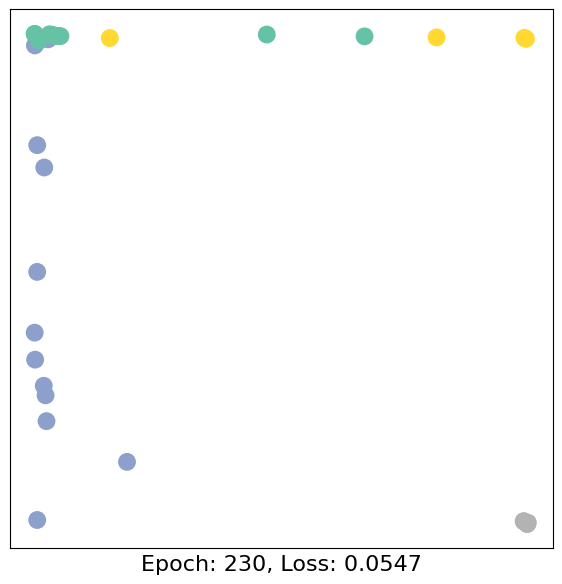

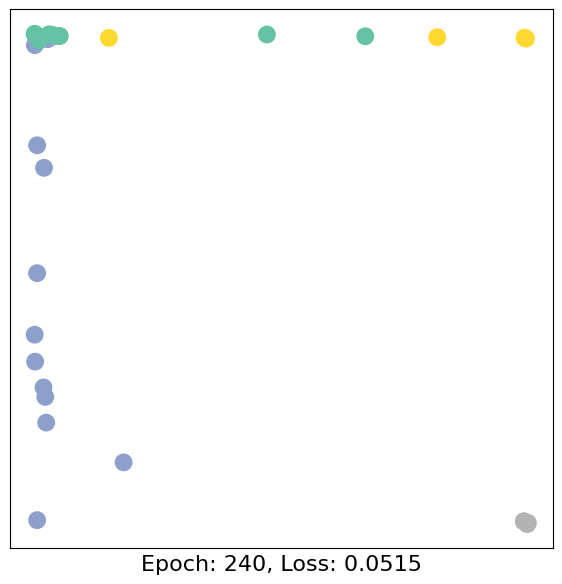

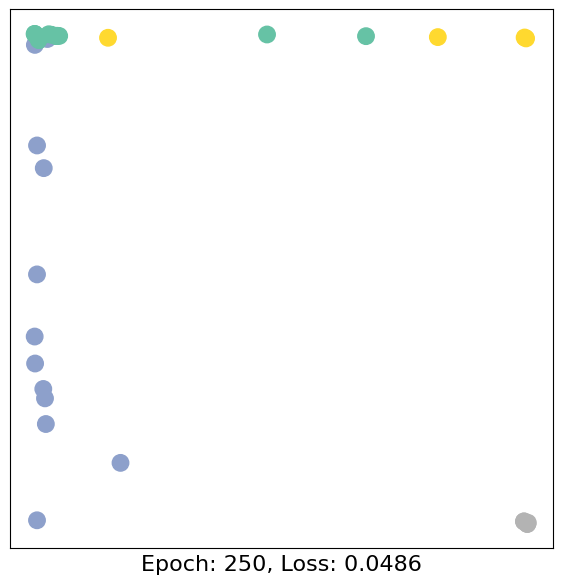

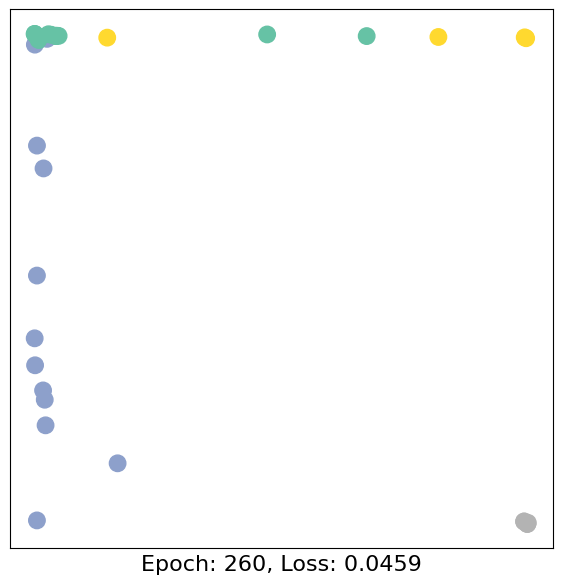

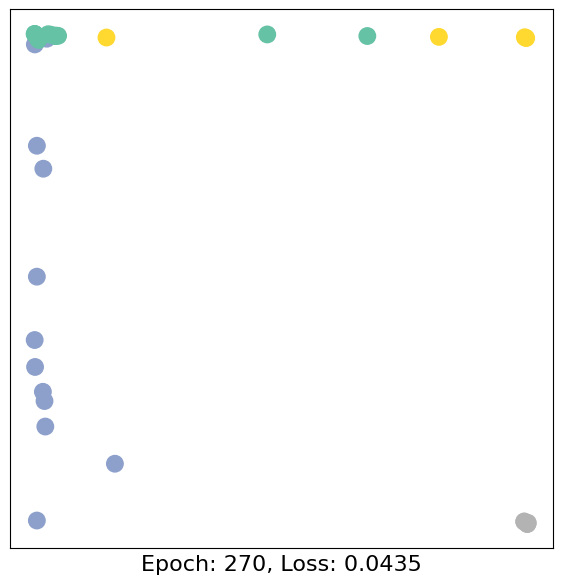

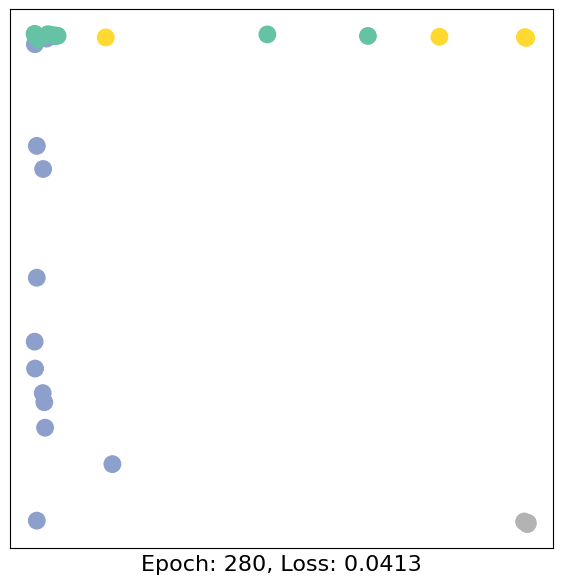

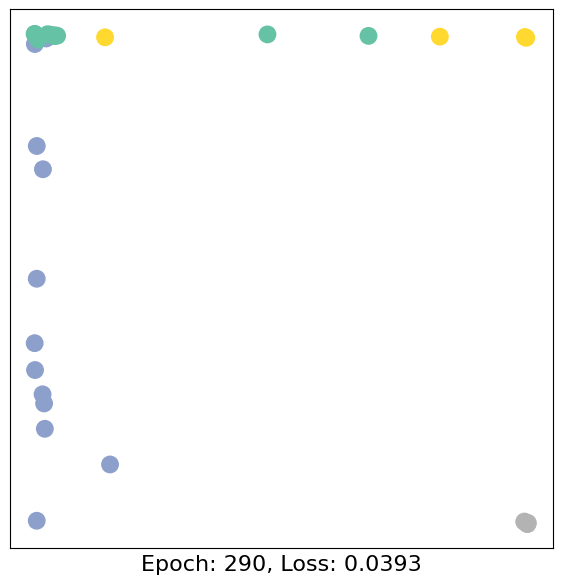

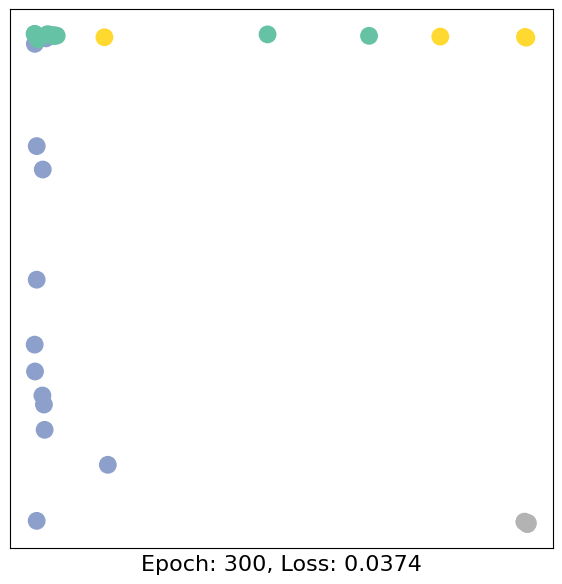

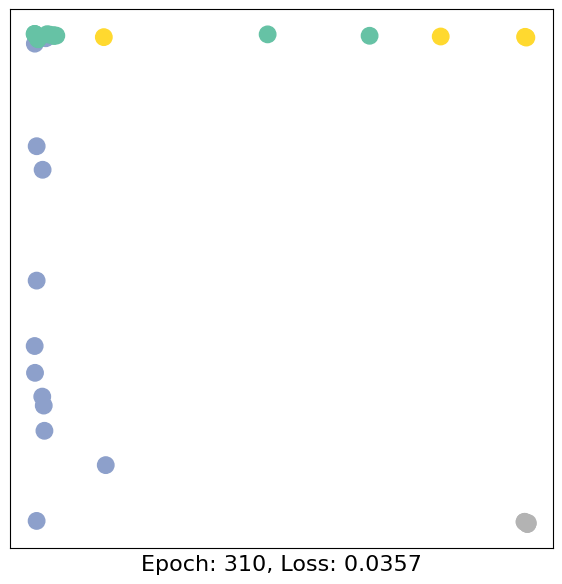

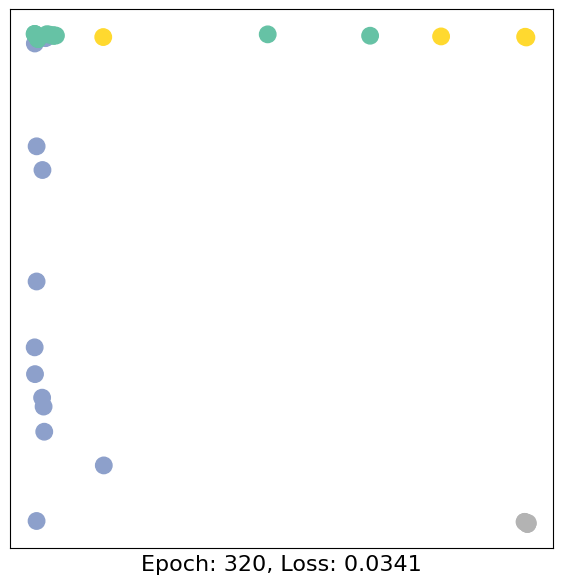

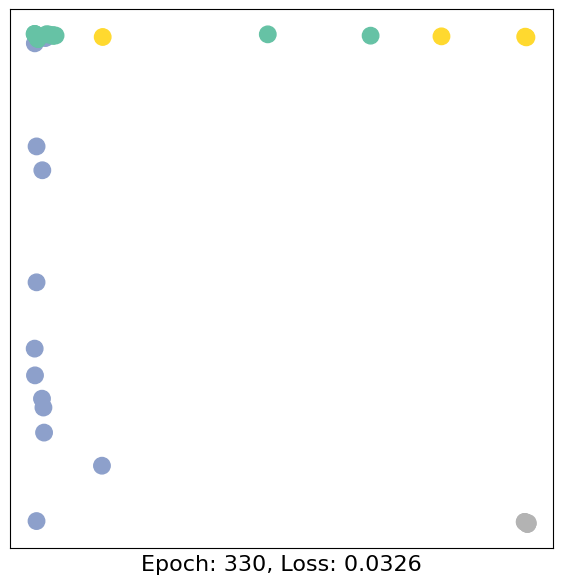

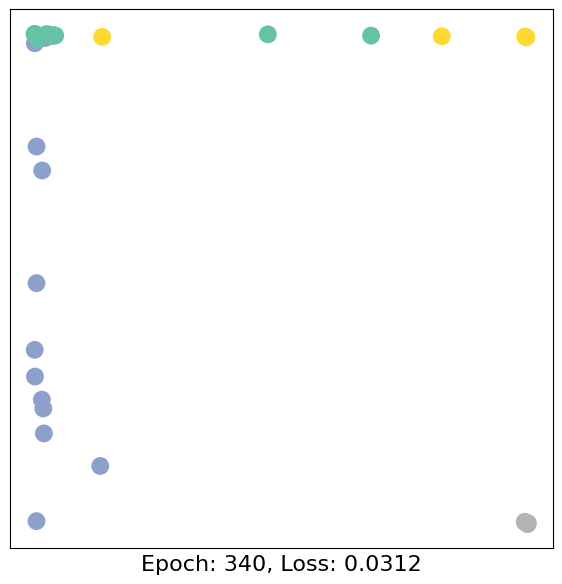

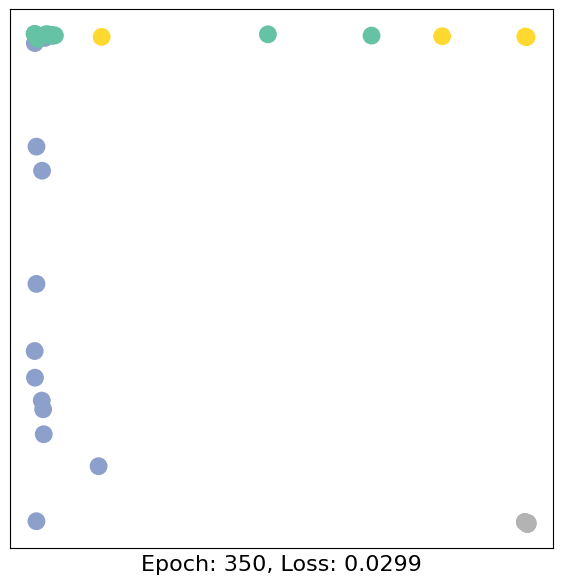

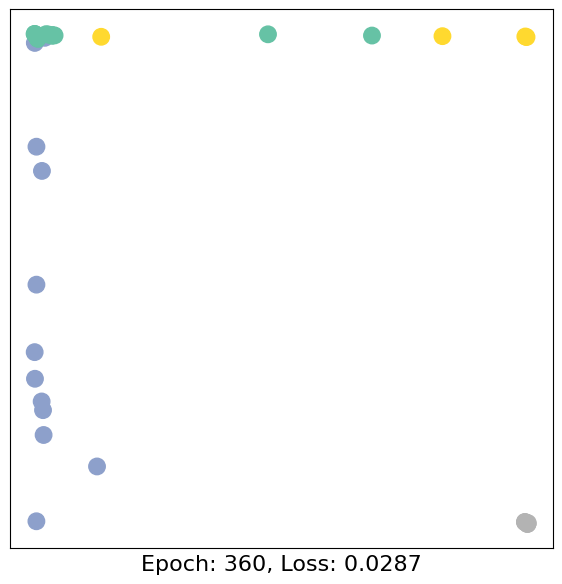

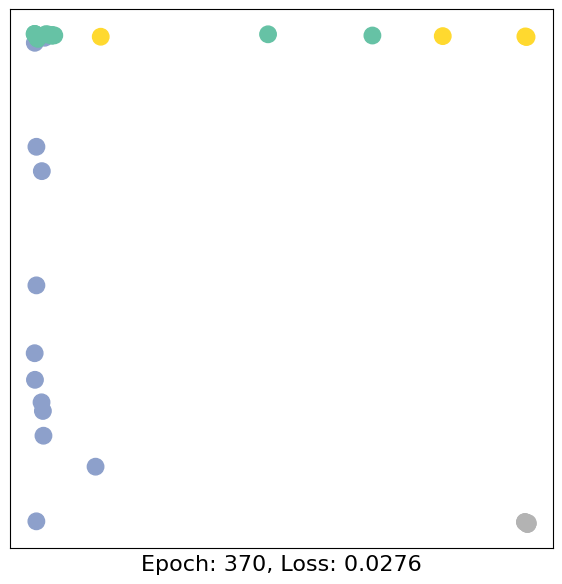

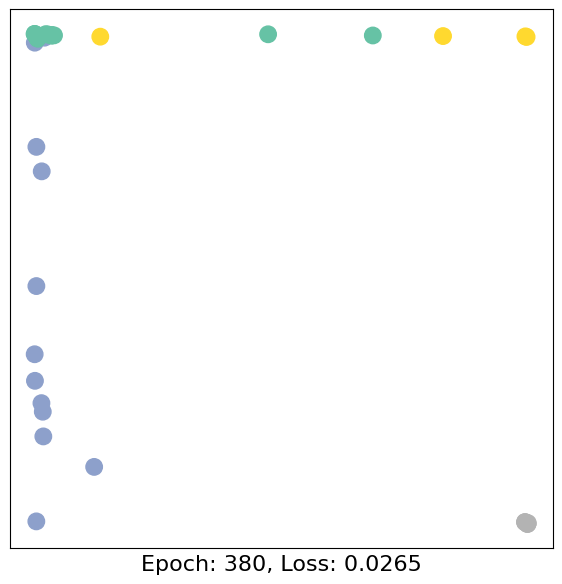

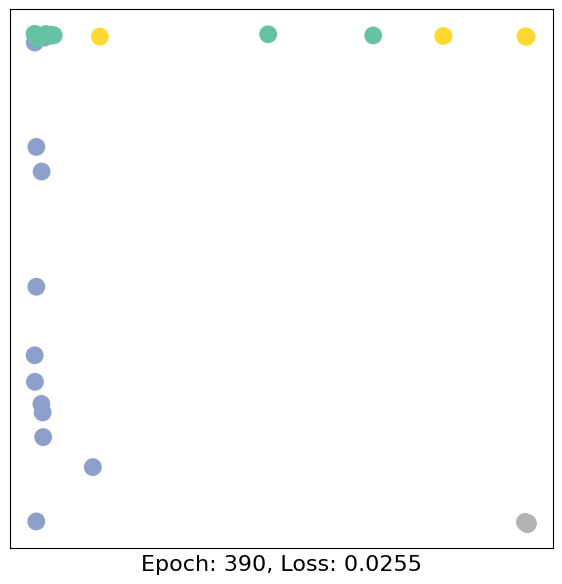

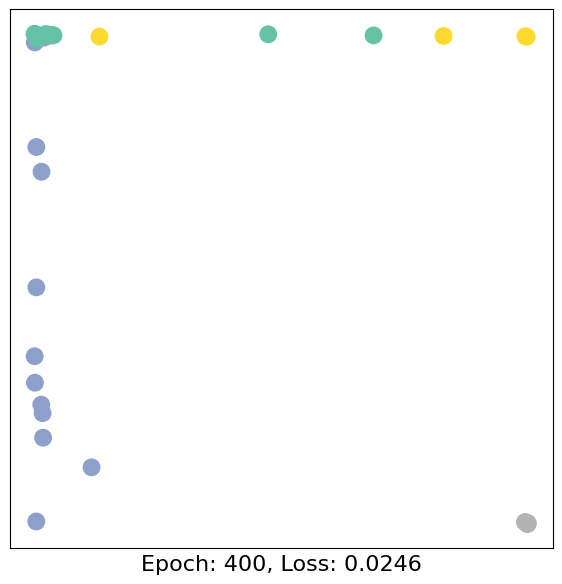

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [ ]:
!pip install snap-stanford

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import snap
G5 = snap.LoadEdgeList(snap.TNGraph, "/content/drive/MyDrive/ICPC/CollegeMsg.txt", 0, 1)

In [ ]:

uniq_indices = []
# edges = torch.tensor()
nodeCount = 0
for NI in G5.Nodes():
  nodeCount+=1
print(f"{nodeCount=}")
edge_mat = torch.zeros((nodeCount, nodeCount))
print(f"{edge_mat=}")

edge_index = []
for EI in G5.Edges():
  # print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))
  edge_mat[EI.GetSrcNId() - 1][EI.GetDstNId() - 1] = 1
  edge_index.append([EI.GetSrcNId(), EI.GetDstNId()])
  # uniq_indices.append(EI.GetSrcNId())
  # uniq_indices.append(EI.GetDstNId())

edge_index = torch.tensor(edge_index)



from torch_geometric.data import Data

nodeCount=1899
edge_mat=tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


(torch.Size([1899, 1899]), torch.Size([20296, 2]))

In [ ]:
edge_mat.shape, edge_index.shape

(torch.Size([1899, 1899]), torch.Size([20296, 2]))